In [2]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the Adult dataset
df = pd.read_excel("adult.xlsx", na_values="?")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#check the shape of the dataset
df.shape

(32561, 15)

In [5]:
#check the data types of the dataset
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

We note that Workclass, education, marital-status,ocuupation, relationship, race,gender,native country and income are categorical variables while the rest are continous variables.

In [6]:
#creating a dataframe for categorical variables
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [7]:
#checking for special characters in the categorical variables
obj_df.apply(lambda x: x.str.contains('?', regex=False).sum())

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
native-country     583
income               0
dtype: int64

In [8]:
#check the distribution of the categorical variables in the dataset
Cat_List=['workclass',  'education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country',
       'income']
for i in Cat_List:
    print(df[i].value_counts())
    print("------------------------------------------------------")
    

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
------------------------------------------------------
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
------------------------------------------------------
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418


From the above results we note 7 individuals who have never worked but have a ? in occupation. these are individuals without or are not expected to contribute to any estimates of income and thus we decide to drop them.

In [9]:
#drop row if workclass=Never-worked and occupation=?
df=df['workclass']=='Never-worked'& df['occupation']=='?'
print(df)

df_new = df.drop(df[(df['workclass'] == 'Never-worked') & (df['occupation'] == '?')].index)
print(df_new)

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [ ]:
#code categorical variables with dummy variables
#obj_df = pd.get_dummies(obj_df, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income"])
#obj_df.head()

#obj_df['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
#obj_df.head()
cleanup_nums = {"gender":     {'Male': 1, 'Female': 0},
                "income": {"<=50k": 0, ">50k": 1}}
obj_df.replace(cleanup_nums, inplace=True)

In [ ]:
obj_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [13]:
obj_df["gender"].replace(["Male", "Female"], [1, 2], inplace=True)
obj_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
#creating a dataframe for continious variables
cont_df = df.select_dtypes(include=['int64']).copy()
cont_df.head()

#obj_df = df.select_dtypes(include=['object']).copy()
#obj_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [11]:
#check the missing values in the dataset
cont_df.isnull().sum()


age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [12]:
#checking for missing values in the categorical variables
obj_df.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

We obseve that there are no missing values in the dataset. All colums appear to be filled with an observation

In [13]:
#checking for special characters in the categorical variables
obj_df.apply(lambda x: x.str.contains('?', regex=False).sum())


workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
native-country     583
income               0
dtype: int64

In [14]:
#imputing the special characters with the mode
obj_df['workclass'].replace({'?': 'Private'}, inplace=True)
obj_df['occupation'].replace({'?': 'Prof-specialty'}, inplace=True)
obj_df['native-country'].replace({'?': 'United-States'}, inplace=True)

In [15]:
#checking for special characters in the categorical variables
obj_df.apply(lambda x: x.str.contains('?', regex=False).sum())

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
native-country     583
income               0
dtype: int64

In [16]:
#check the summary of the dataset
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


the results indicate some variables that are likely to have outliers such as Age with a mean of 38.6 years while having a huge standard deviation of 13.6 years. furthermore Hours per week with the huge difference between the minmum and maximum value indicates it may not be normally distributed

In [17]:
#check the correlation of the dataset
df.corr()
#using a Heatmap to visualize the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


ValueError: could not convert string to float: ' State-gov'

In [ ]:
#check the unique values in the dataset
df.nunique()


age                   73
workclass              9
fnlwgt             21648
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         119
capital-loss          92
hours-per-week        94
native-country        42
income                 2
dtype: int64

In [ ]:
# printing a list of all variable names
print(df.columns)   

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

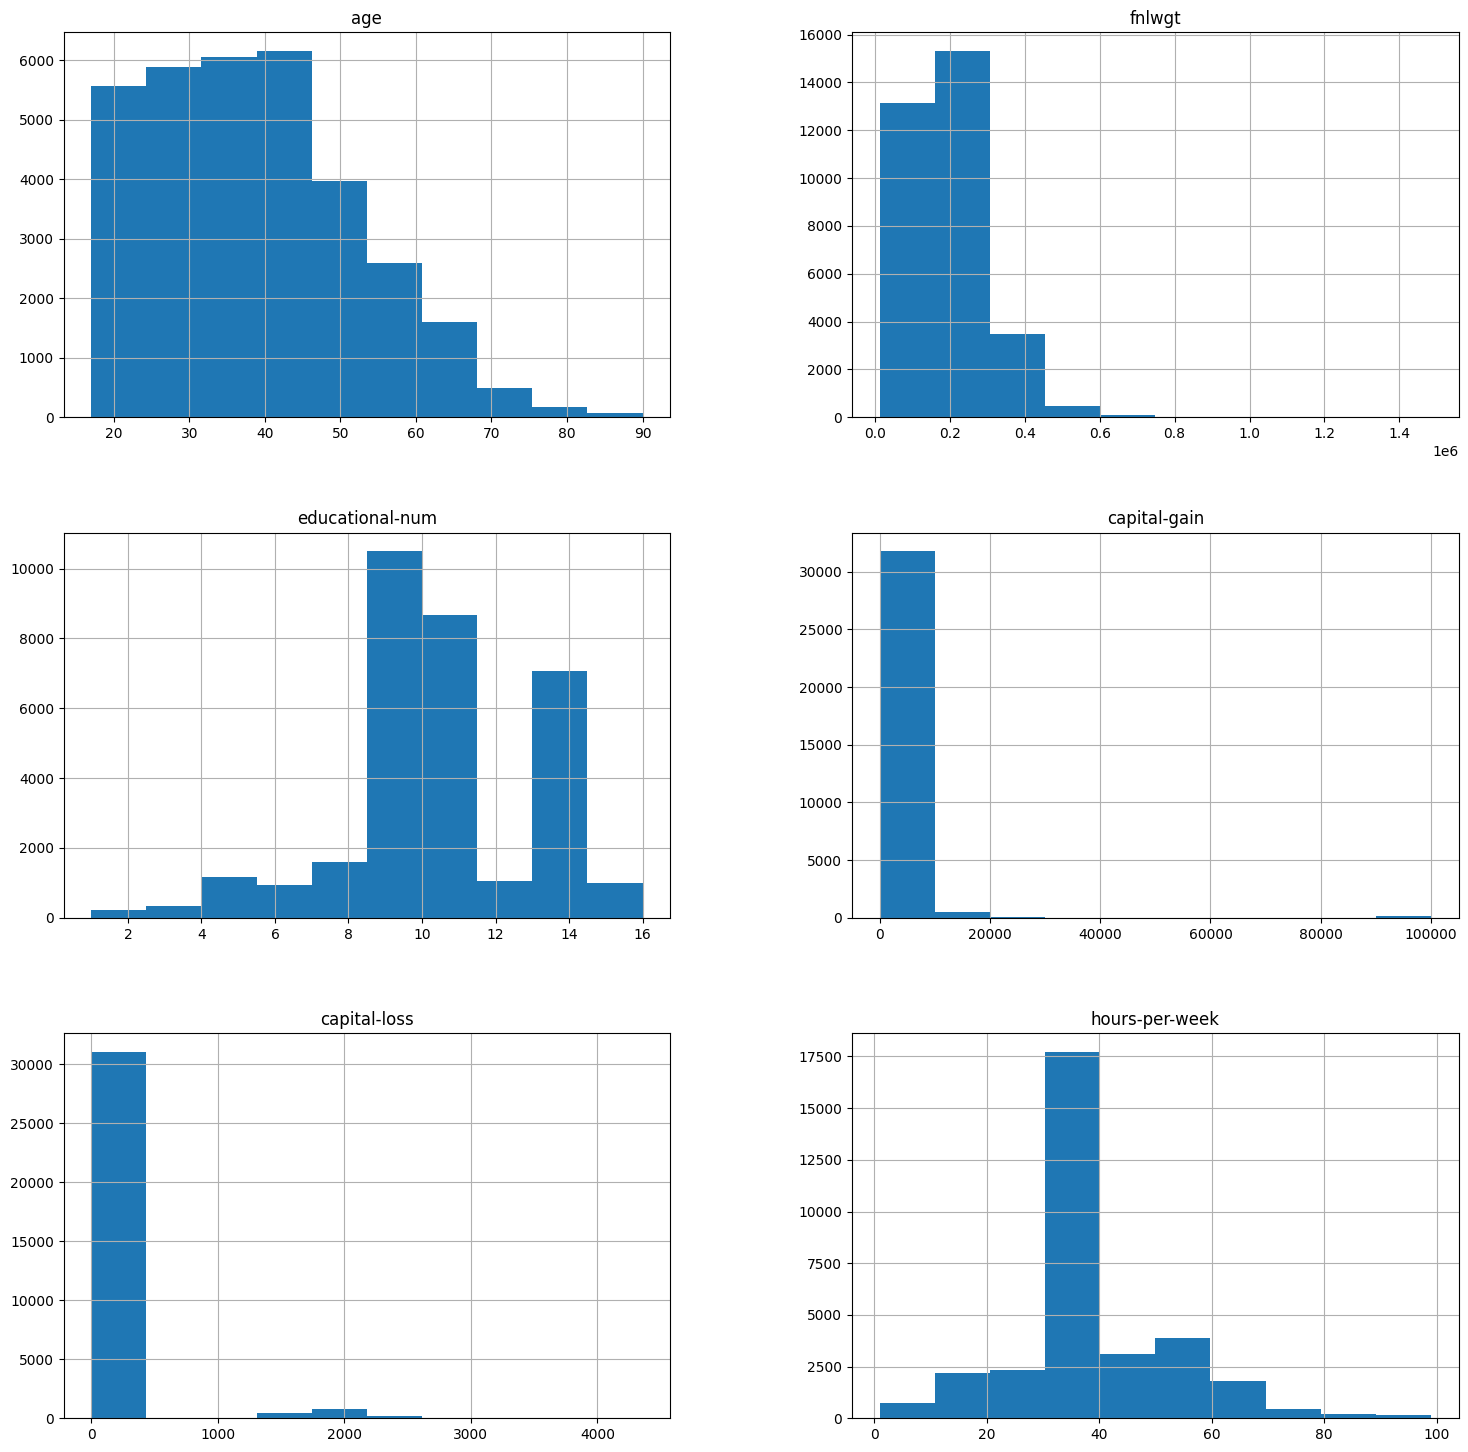

In [ ]:
#check the distribution of the continious variables in the dataset
Cont_List=['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
df[Cont_List].hist(figsize=(18,18))

In [18]:
#check the distribution of the categorical variables in the dataset
Cat_List=['workclass',  'education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country',
       'income']
for i in Cat_List:
    print(df[i].value_counts())
    print("------------------------------------------------------")
    

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
------------------------------------------------------
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
------------------------------------------------------
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418


In [ ]:
#ploting the distribution of the categorical variables in the dataset
#using a Barplot
def PlotBarCharts(inpData, colsToPlot):
     
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


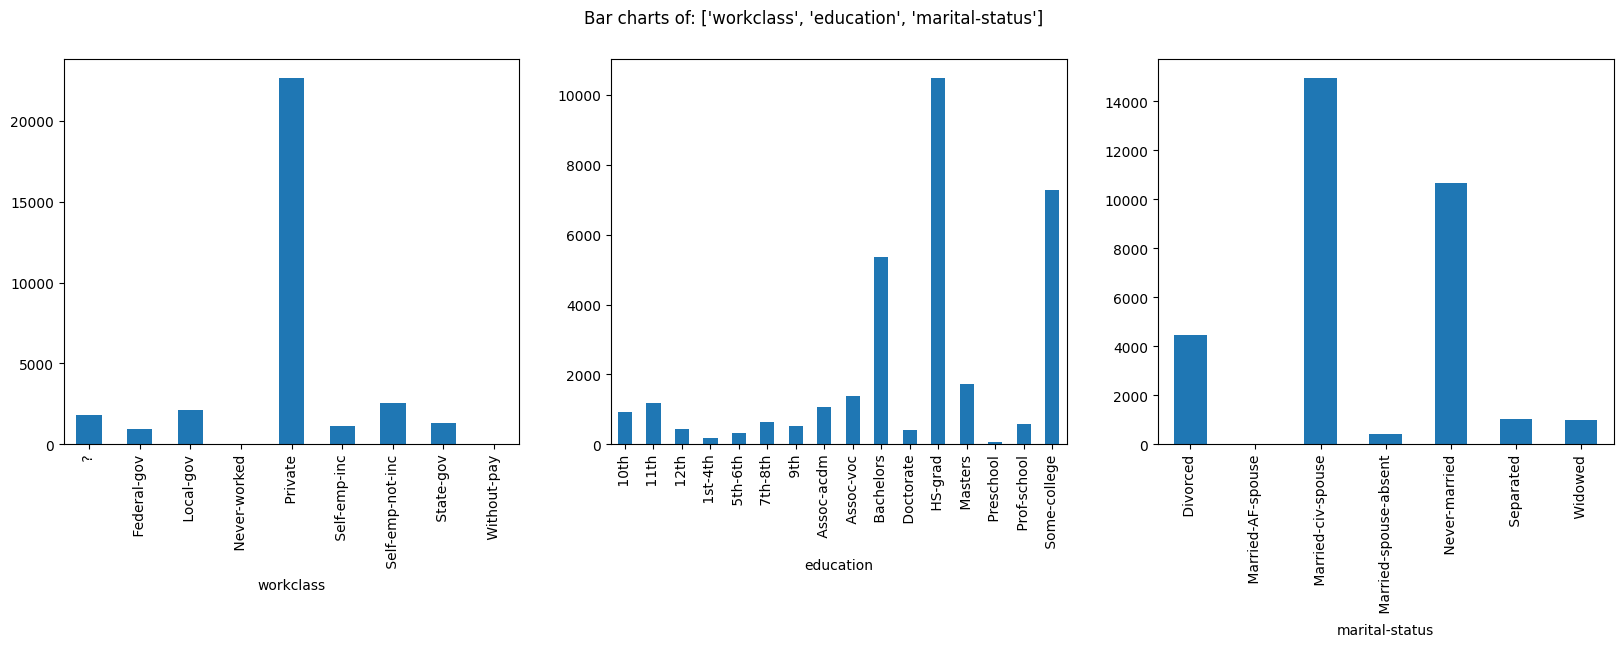

In [ ]:
# Using the function for categorical variables in Adult dataset
PlotBarCharts(inpData=df, colsToPlot=['workclass',  'education','marital-status'])

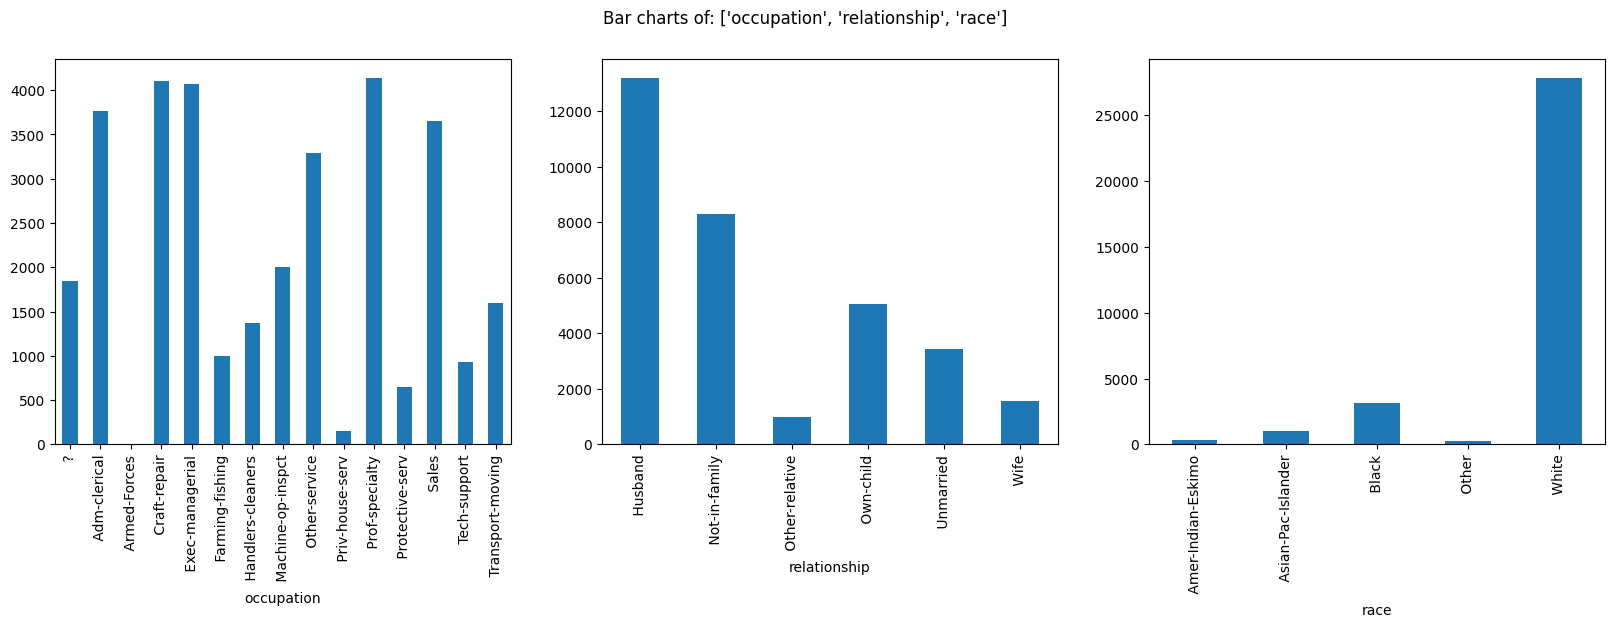

In [ ]:
# Using the function for categorical variables in Adult dataset
PlotBarCharts(inpData=df, colsToPlot=['occupation', 'relationship', 'race'])

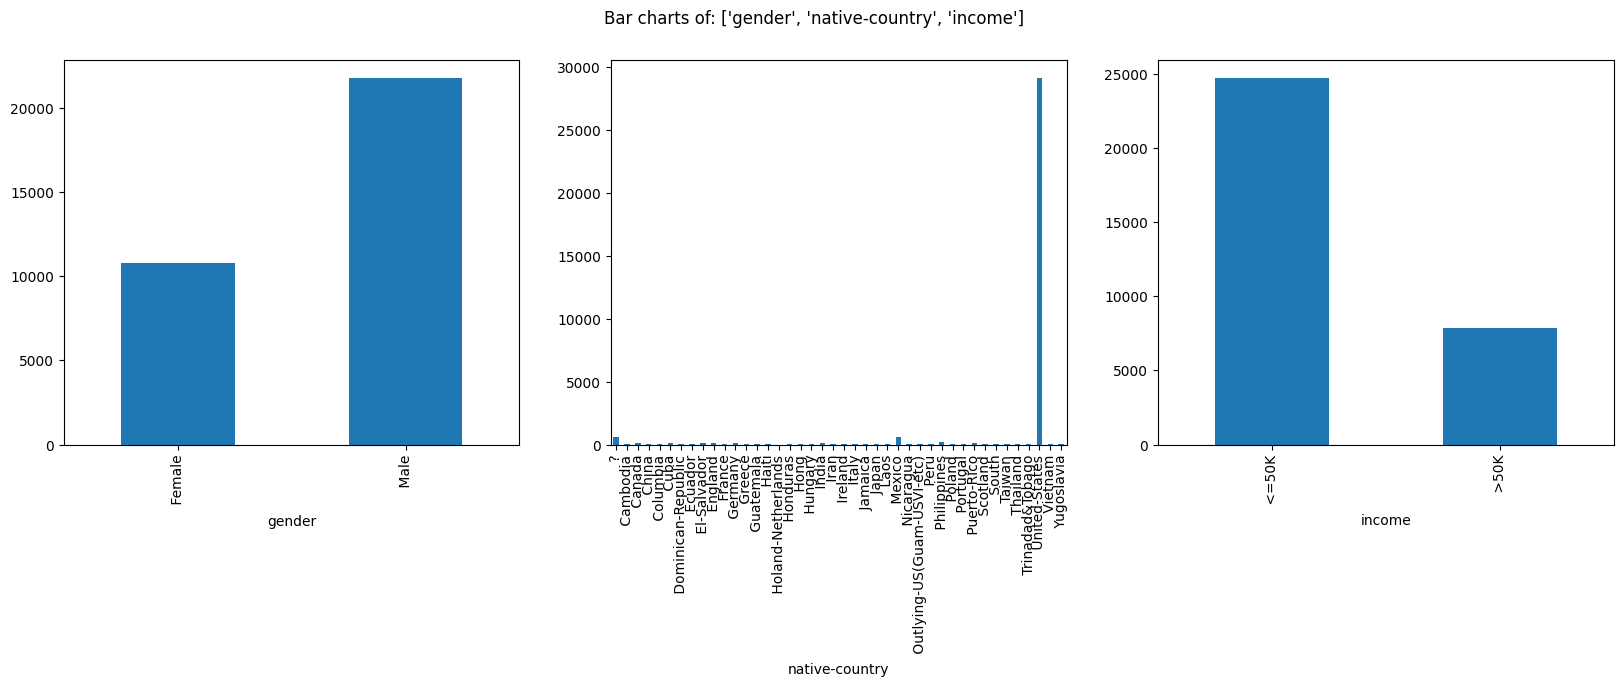

In [ ]:
# Using the function for categorical variables in Adult dataset
PlotBarCharts(inpData=df, colsToPlot=['gender','native-country','income'])

In [ ]:
#cheking the outliers in the dataset
#using a Boxplot
def PlotBoxPlot(inpData, colsToPlot):
        
        import matplotlib.pyplot as plt
        
        fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
        fig.suptitle('Box plots of '+ str(colsToPlot))
    
        for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
            inpData.boxplot(column=colName, ax=subPlot[plotNumber])


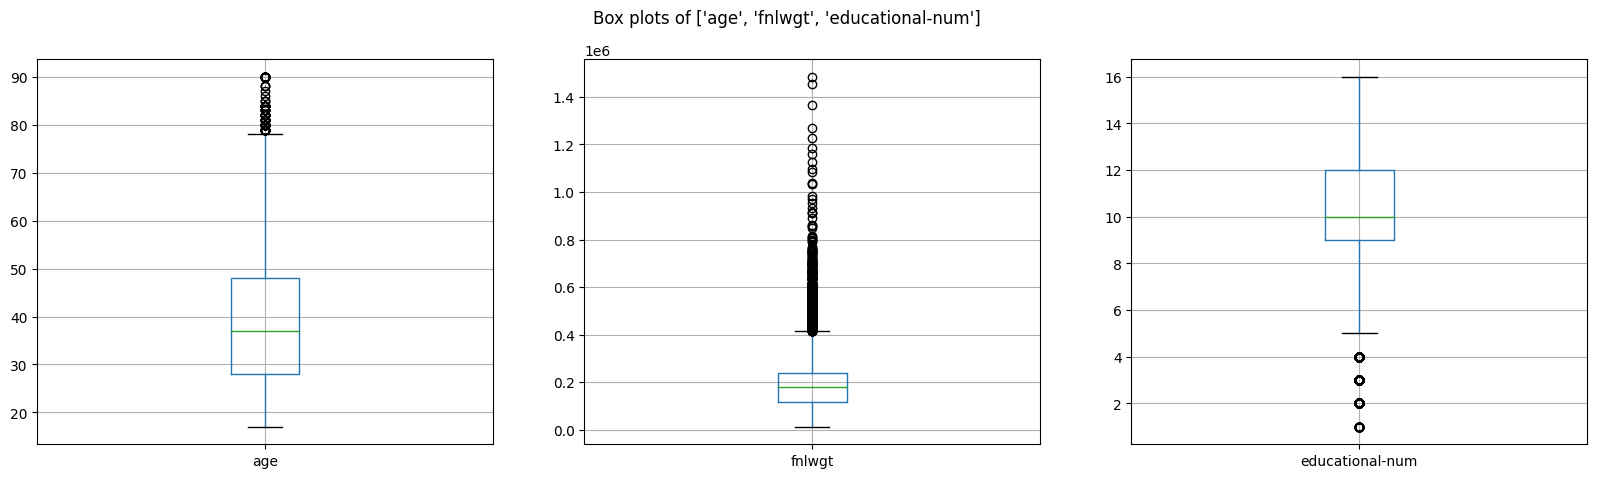

In [ ]:
# Using the function for variables in Adult dataset
PlotBoxPlot(inpData=df, colsToPlot=['age','fnlwgt','educational-num'])


We note that fnlwgt may have some observations that are outliers above 1.4 mark

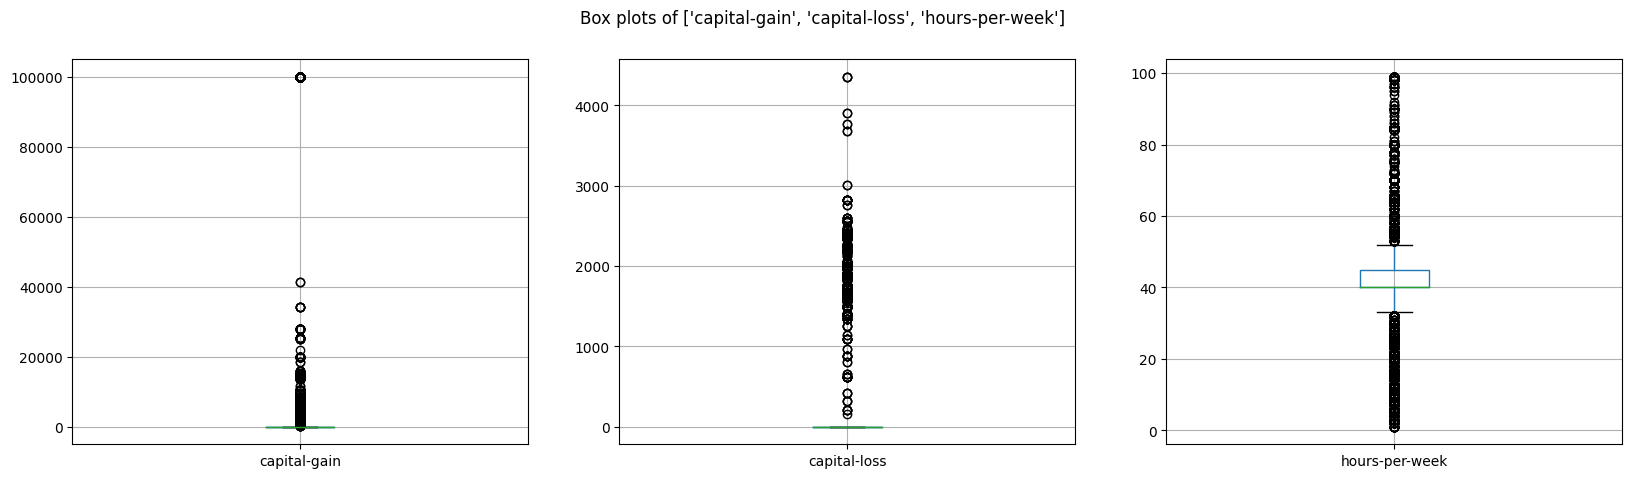

In [ ]:
# Using the function for variables in Adult dataset
PlotBoxPlot(inpData=df, colsToPlot=['capital-gain','capital-loss','hours-per-week'])


From the box plot above we note that Capital-gain at 100,000 and capital loss after 3000 has an outlier thus a need to transform the data set

In [ ]:
#imputing for the outliers in the dataset for capital-gain = 1000000 with the mean value for the column
df.loc[df['capital-gain'] == 1000000, 'capital-gain'] = df['capital-gain'].median()
df.loc[df['capital-loss'] >4000, 'capital-loss'] = df['capital-loss'].median()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

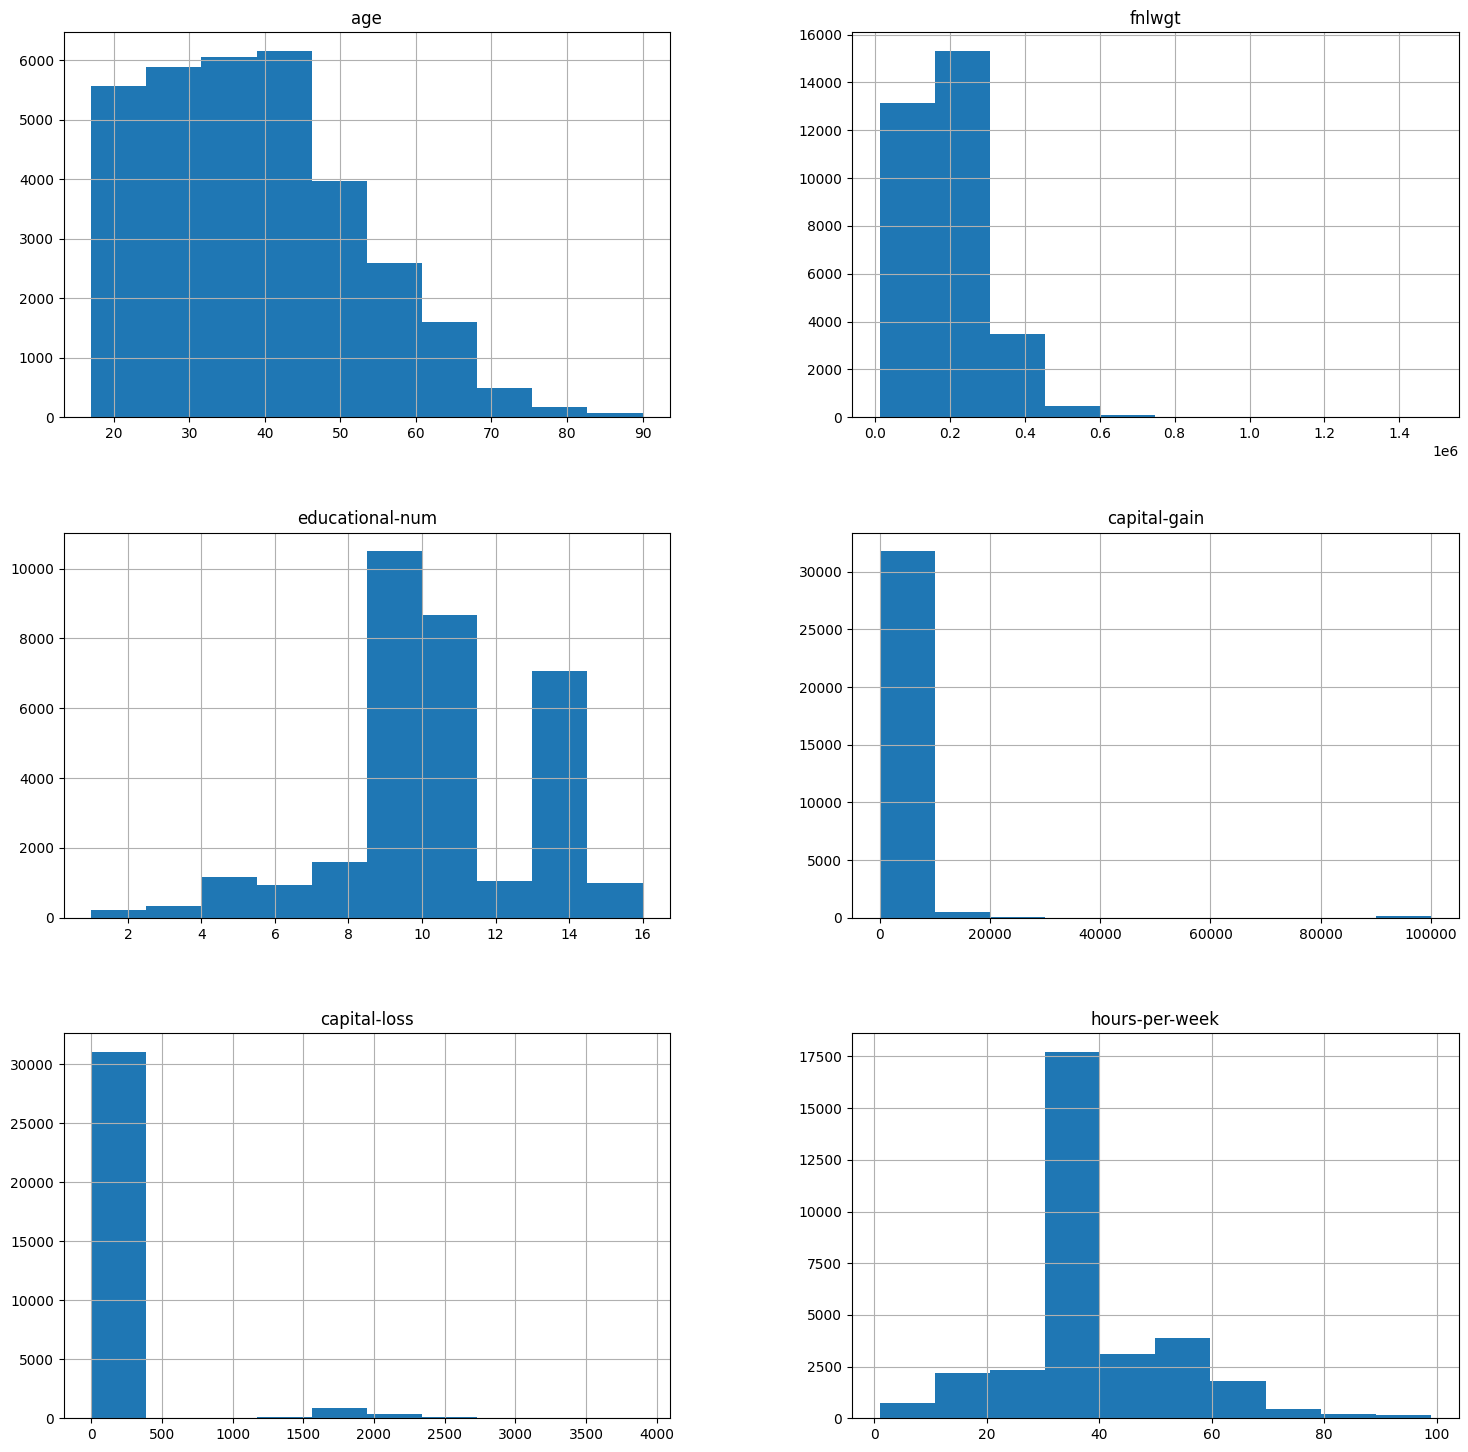

In [ ]:
#visualizing the distribution of the continious variables in the dataset after outlier treatment
Cont_List=['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
df[Cont_List].hist(figsize=(18,18))


In [ ]:
#checking for unique values in the dataset
df.nunique()


age                   73
workclass              9
fnlwgt             21648
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         119
capital-loss          92
hours-per-week        94
native-country        42
income                 2
dtype: int64

In [ ]:
#checking for duplicate values in the dataset
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)


Shape After deleting duplicate values: (32537, 15)


From the results above, we do not have any duplicates in the dataset.

In [ ]:
#checking for missing values in the dataset
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [121]:
# Treating all the nominal variables at once using dummy variables
df_cat= pd.get_dummies(df, drop_first=True)
df_cat.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [132]:
#choose the best columns(Features/VARIABLES) which are correlated to the Target variable income
#using pearson correlation with income
df_cat[Cont_List].corr()df_cat['income'].sort_values(ascending=False)



SyntaxError: invalid syntax (3304168717.py, line 3)

In [102]:
#printing colums names
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [103]:
# Separate Target Variable and Predictor Variables
TargetVariable='income'
Predictors=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',]

X=df[Predictors].values
y=df[TargetVariable].values


In [104]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [23]:
#dropping useless columns from the dataset
df=df.drop(['PID'],axis=1)
df.head()

,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


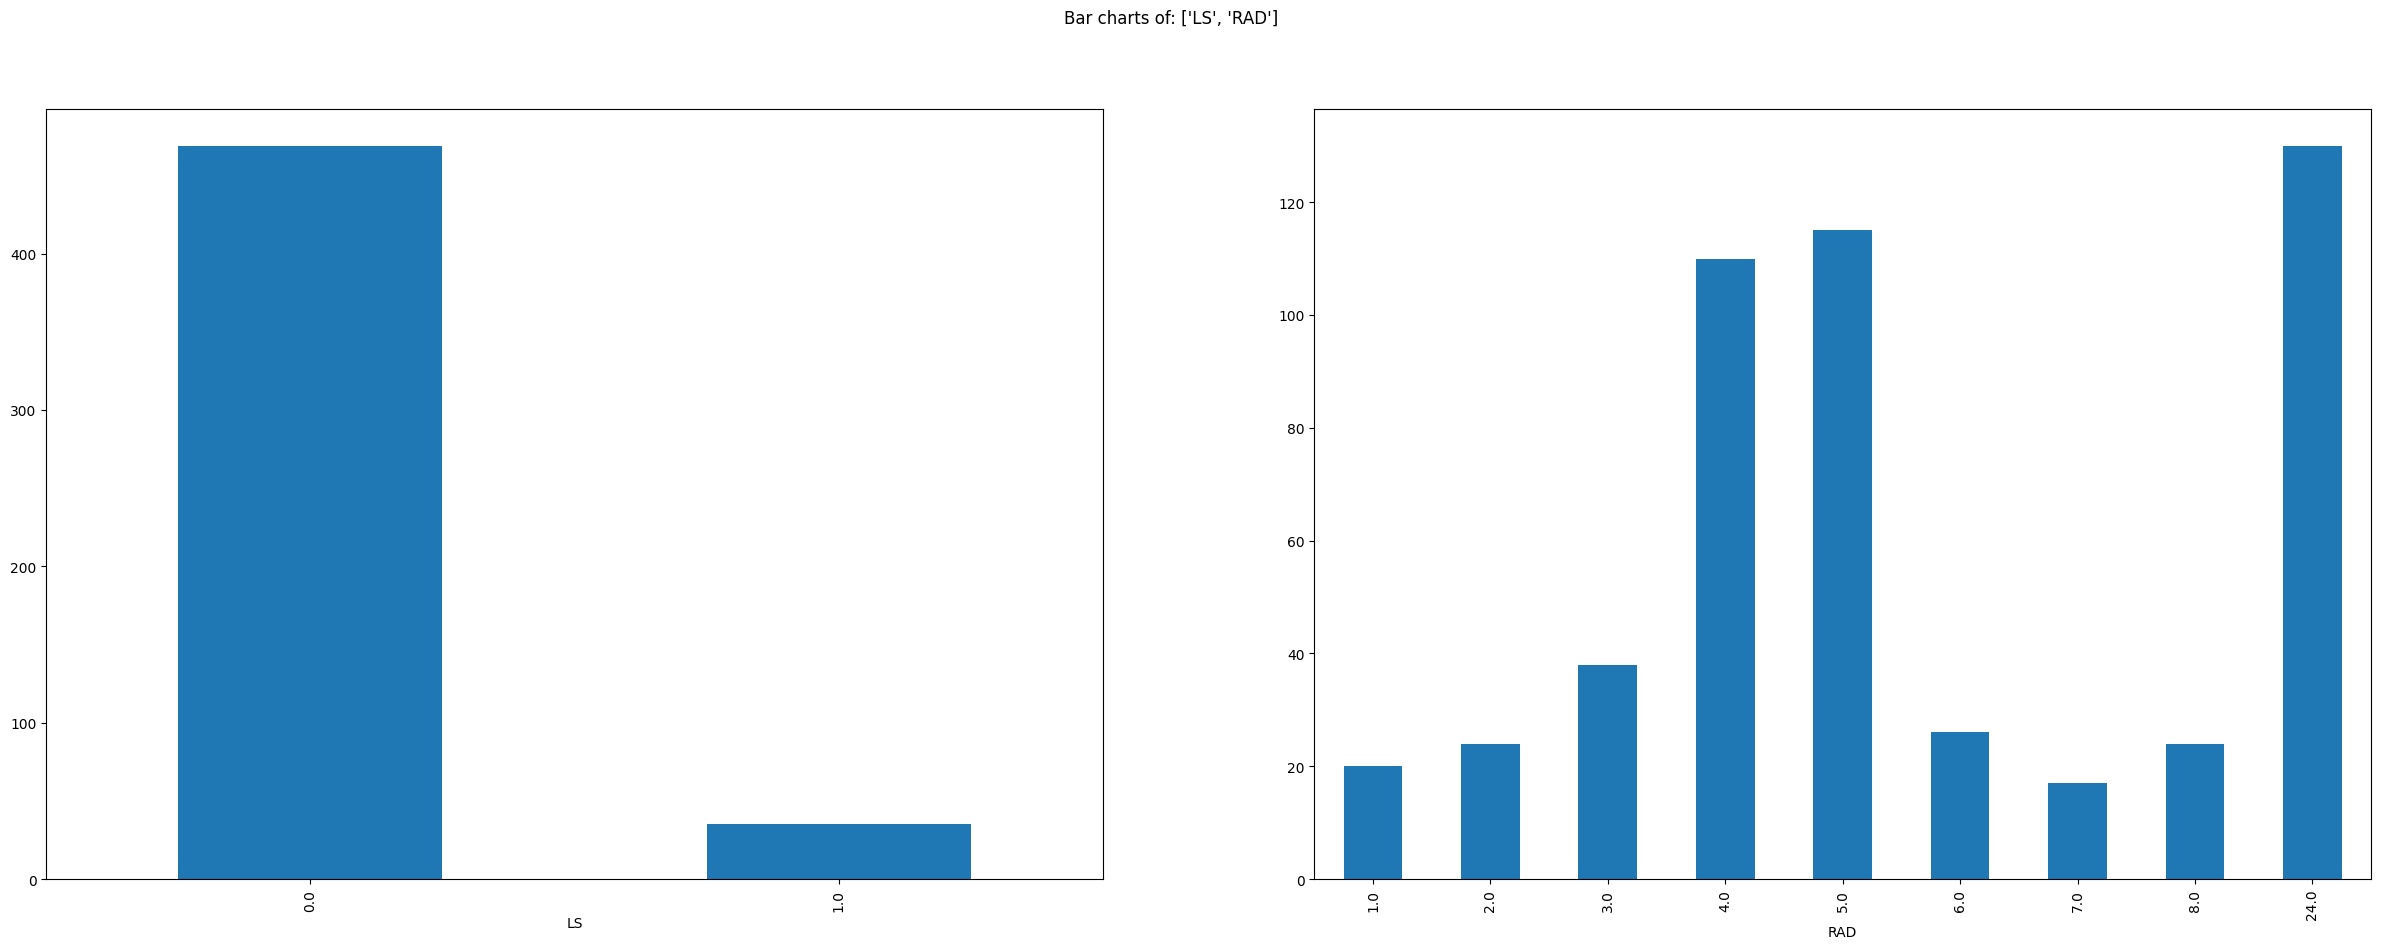

In [26]:
# Plotting multiple bar charts at once for categorical variables
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):

    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

## Calling the function
PlotBarCharts(inpData=df, colsToPlot=['LS', 'RAD'])  

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'PR'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'DMT'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MO'}>, <Axes: title={'center': 'TAX'}>]],
      dtype=object)

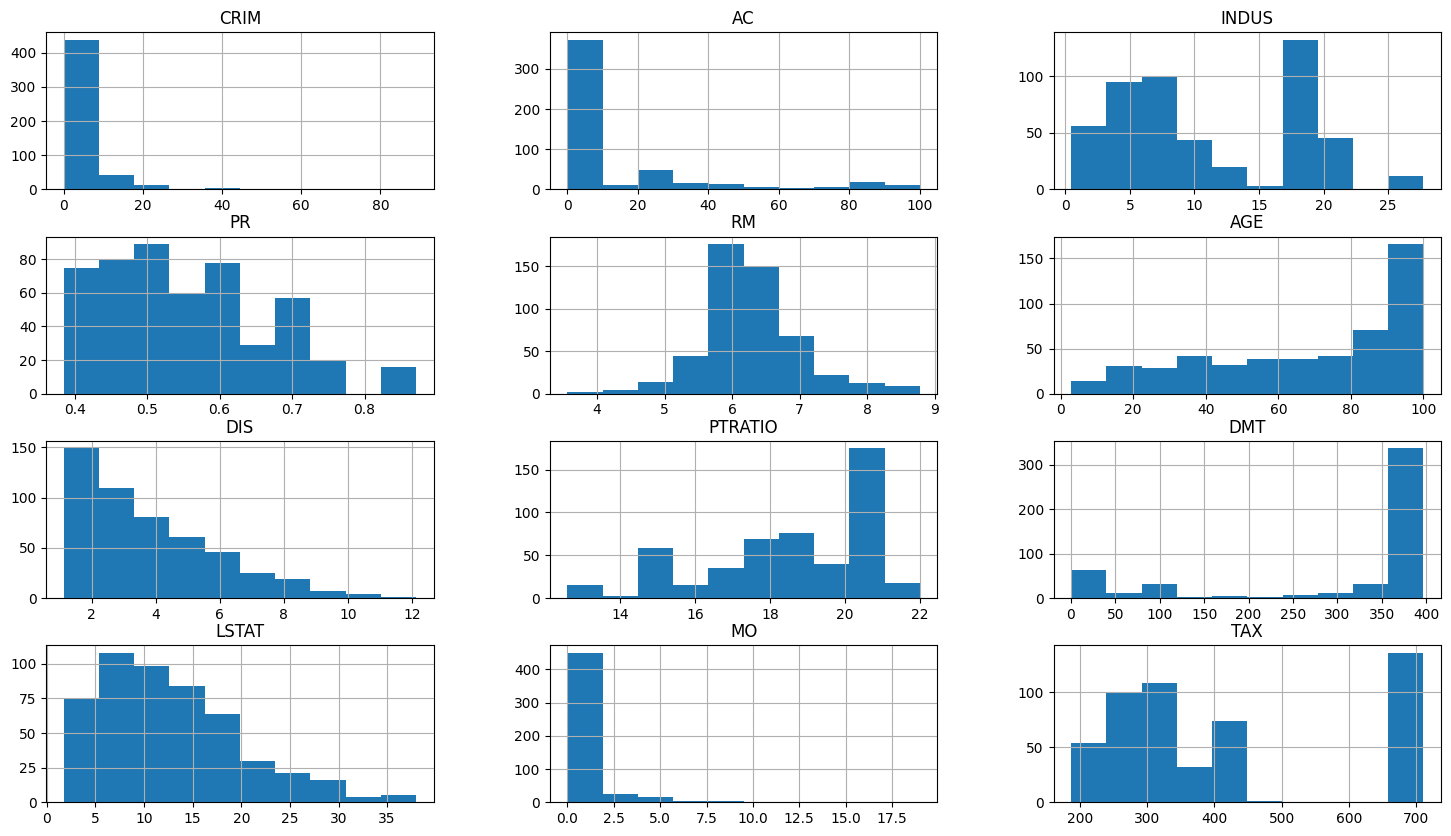

In [27]:
#checking for the distribution of the continious variables
df.hist(['CRIM','AC','INDUS','PR','RM','AGE','DIS','PTRATIO','DMT','LSTAT','MO','TAX'], figsize=(18,10))

In [30]:
#treatment of outliers
#removing outliers from the dataset

inpData=df
colName=['CRIM','AC','INDUS','PR','RM','AGE','DIS','PTRATIO','DMT','LSTAT','MO','TAX']

def removeOutliers(inpData, colName):
    Q1=inpData[colName].quantile(0.25) #25th quantile
    Q3=inpData[colName].quantile(0.75) #75th quantile
    IQR=Q3-Q1 #Interquartile range
    lowerRange=Q1-1.5*IQR #lower range
    upperRange=Q3+1.5*IQR #upper range
    inpData[inpData[colName]<lowerRange][colName]=lowerRange #replacing the lower range with the lower range value
    inpData[inpData[colName]>upperRange][colName]=upperRange #replacing the upper range with the upper range value
    return inpData


In [31]:
#checking for outliers in the dataset
for col in colName:
    df=removeOutliers(df,col)
    print('Outliers treated for: ',col)


Outliers treated for:  CRIM
Outliers treated for:  AC
Outliers treated for:  INDUS
Outliers treated for:  PR
Outliers treated for:  RM
Outliers treated for:  AGE
Outliers treated for:  DIS
Outliers treated for:  PTRATIO
Outliers treated for:  DMT
Outliers treated for:  LSTAT
Outliers treated for:  MO
Outliers treated for:  TAX


<Axes: >

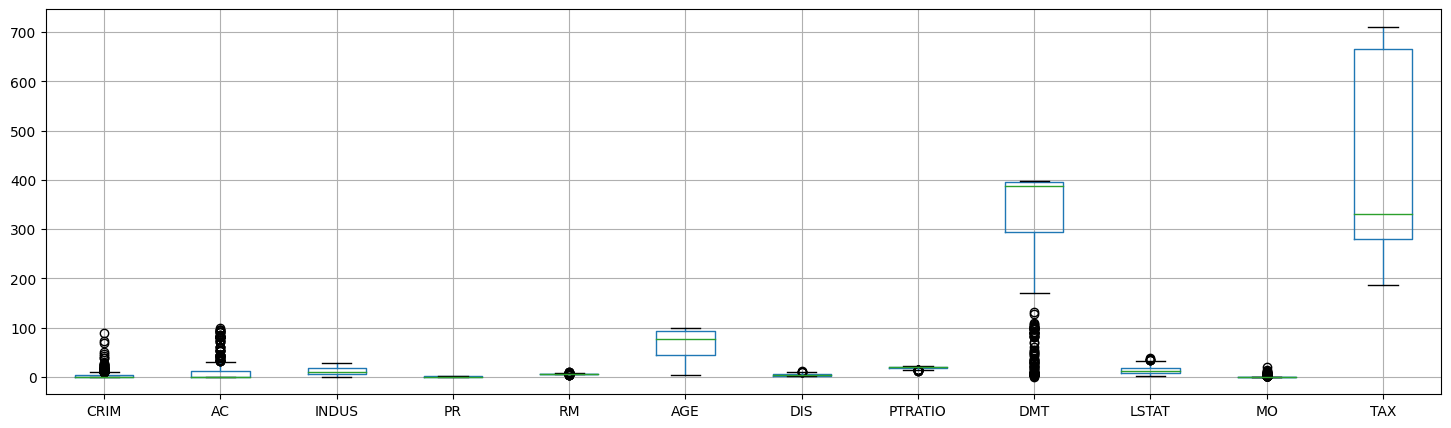

In [32]:
#checking for outliers after treatment using visualization
df.boxplot(column=['CRIM','AC','INDUS','PR','RM','AGE','DIS','PTRATIO','DMT','LSTAT','MO','TAX'],figsize=(18,5))


In [33]:
#showing the missing values in the categorical Variables
df['LS'].value_counts(dropna=False)

LS
0.0    469
1.0     35
NaN      2
Name: count, dtype: int64

In [34]:
#showing the missing values in the categorical Variables
df['RAD'].value_counts(dropna=False)

RAD
24.0    130
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
NaN       2
Name: count, dtype: int64

In [35]:
# Imputing the missing values
# Using MODE for categorical columns
df['LS'].fillna(df['LS'].mode()[0], inplace=True)
df['RAD'].fillna(df['RAD'].mode()[0], inplace=True)

In [36]:
#checking for missing values after imputation
df['LS'].value_counts(dropna=False)

LS
0.0    471
1.0     35
Name: count, dtype: int64

In [37]:
#checking for missing values after imputation
df['RAD'].value_counts(dropna=False)

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

In [38]:
#checking for missing values in the numerical variables
df.isnull().sum()

CRIM       2
AC         0
INDUS      0
LS         0
PR         3
RM         4
AGE        4
DIS        3
RAD        0
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64

From the results above we note that we have missing values in CRIM, PR, RM, AGE,DIS,PTRATIO, DMT, LSTAT,MO,TAX

In [39]:
# Imputing the missing values
# Using MEAN for numerical columns
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)# we can assume that the missing values are due to the fact that the crime rate is very low
df['PR'].fillna(df['PR'].mean(), inplace=True)#The pollusion rate is on average the same across the area
df['RM'].fillna(df['RM'].mean(), inplace=True)# we use the average number of rooms in the area since it makes sense
df['AGE'].fillna(df['AGE'].median(), inplace=True)#we use the Median age since houses deveopers construct them in blocks thus are of the same age
df['DIS'].fillna(df['DIS'].mean(), inplace=True)
df['PTRATIO'].fillna(df['PTRATIO'].mean(), inplace=True)
df['DMT'].fillna(df['DMT'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)
df['MO'].fillna(df['MO'].mean(), inplace=True)
df['TAX'].fillna(df['TAX'].mean(), inplace=True)


In [40]:
#checking for missing values after imputation
df.isnull().sum()

CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

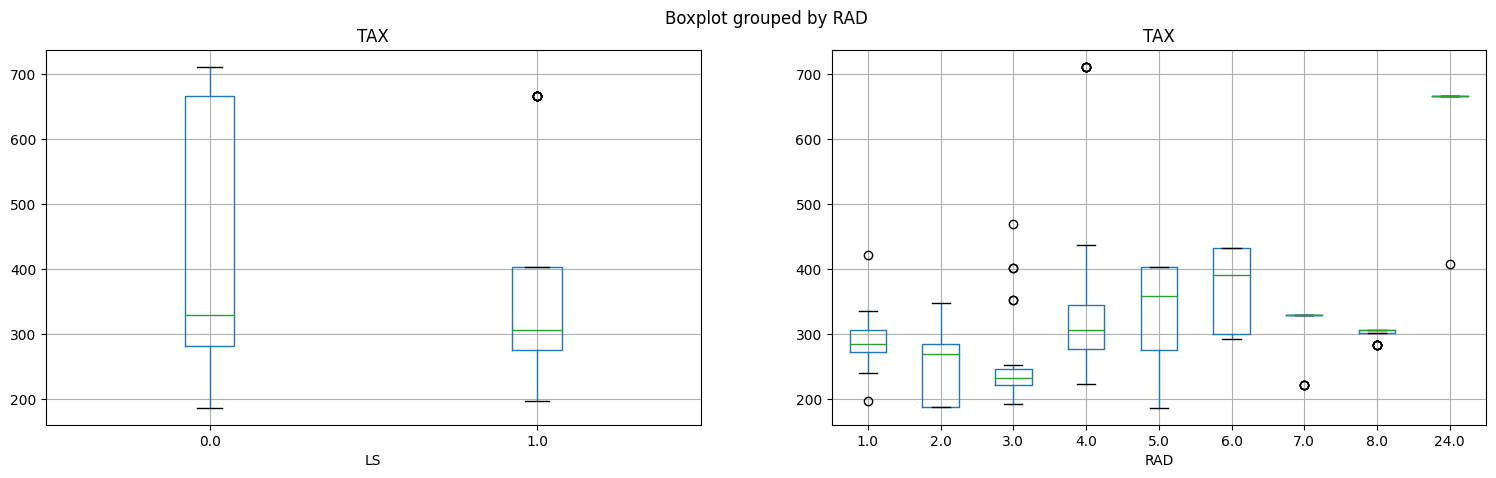

In [43]:
# Box plots for continuous Target Variable "TAX" and Categorical predictors
Cat_List=['LS','RAD']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(Cat_List), figsize=(18,5))

# Creating box plots for each Categorical predictor against the Target Variable "TAX"
for PredictorCol , i in zip(Cat_List, range(len(Cat_List))):
    df.boxplot(column='TAX', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [44]:
# Defining a function to find the statistical relationship with all the categorical variables with TAX
def FunctionAnova(inpData, TargetVariable, Cat_List):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in Cat_List:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [48]:
# Calling the function to check which categorical variables are correlated with target Variable TAX
Cat_List=['LS','RAD']
FunctionAnova(inpData=df, TargetVariable='TAX', Cat_List=Cat_List)

##### ANOVA Results ##### 

LS is correlated with TAX | P-Value: 4.240175368139766e-05
RAD is correlated with TAX | P-Value: 0.0


['LS', 'RAD']

In [56]:
#checking for correlation wih P values between the continious variables and the Target variable TAX
from scipy.stats import pearsonr
colName=['CRIM','AC','INDUS','PR','RM','AGE','DIS','PTRATIO','DMT','LSTAT','MO','TAX']
for col in colName:
    pearson_coef,p_value=pearsonr(df[col],df['TAX'])
    print(col,'is correlated with TAX with a P value of',p_value)
    


CRIM is correlated with TAX with a P value of 4.82072164107796e-47
AC is correlated with TAX with a P value of 5.014232260727684e-13
INDUS is correlated with TAX with a P value of 8.744234411742159e-82
PR is correlated with TAX with a P value of 7.713956740356956e-66
RM is correlated with TAX with a P value of 3.087472378185489e-11
AGE is correlated with TAX with a P value of 1.774953981638537e-33
DIS is correlated with TAX with a P value of 1.5717600382154736e-38
PTRATIO is correlated with TAX with a P value of 8.155922237044215e-28
DMT is correlated with TAX with a P value of 2.4328730853993535e-12
LSTAT is correlated with TAX with a P value of 1.4389798203535491e-40
MO is correlated with TAX with a P value of 1.002556889728029e-07
TAX is correlated with TAX with a P value of 0.0


In [60]:
#feature selection
# Selecting final predictors for Machine Learning
SelectedColumns=['CRIM','AC','INDUS','PR','RM','AGE','DIS','PTRATIO','DMT','LSTAT','MO','LS','RAD','TAX']
DataForML=df[SelectedColumns]
DataForML.head()


,CRIM,AC,INDUS,PR,RM,AGE,DIS,PTRATIO,DMT,LSTAT,MO,LS,RAD,TAX
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,2.0,0.0,1.0,296.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,2.0,0.0,2.0,242.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,292.40,4.03,3.0,0.0,2.0,242.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,0.0,0.0,3.0,222.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,0.0,0.0,3.0,222.0


In [61]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [62]:
#splitting the dataset into X and Y
X=DataForML.drop(['TAX'],axis=1)
Y=DataForML['TAX']


In [63]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)

In [64]:
#Decision Trees
# Building Decision Tree - CART Algorithm
from sklearn.tree import DecisionTreeRegressor
DTreeModel = DecisionTreeRegressor(random_state=1234) #max_depth=2
DTreeModel.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=1234)

              precision    recall  f1-score   support

       187.0       0.00      0.00      0.00         1
       188.0       1.00      1.00      1.00         3
       193.0       0.50      1.00      0.67         1
       216.0       1.00      0.50      0.67         2
       222.0       0.00      0.00      0.00         4
       224.0       0.67      1.00      0.80         2
       226.0       0.00      0.00      0.00         1
       233.0       1.00      1.00      1.00         2
       241.0       0.00      0.00      0.00         0
       243.0       1.00      1.00      1.00         1
       252.0       1.00      1.00      1.00         1
       254.0       0.00      0.00      0.00         0
       256.0       0.00      0.00      0.00         1
       264.0       1.00      0.80      0.89         5
       265.0       1.00      1.00      1.00         1
       270.0       1.00      1.00      1.00         3
       276.0       1.00      0.33      0.50         3
       277.0       1.00    

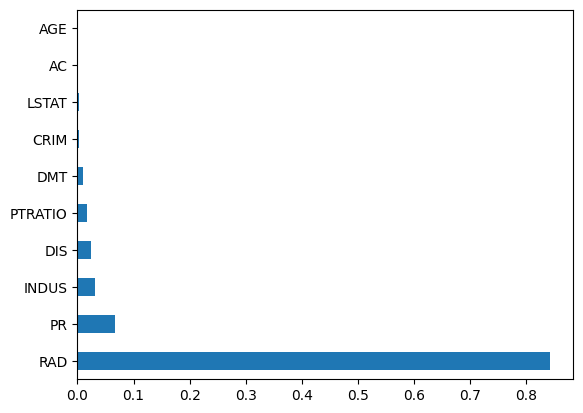

In [74]:
# Measuring accuracy on Testing Data
# We are making predictions on testing data
Predictions= DTreeModel.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test, Predictions))
print(metrics.confusion_matrix(Y_test, Predictions))
print(metrics.accuracy_score(Y_test, Predictions))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(Y_test, Predictions, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
# This step is not required, but just for the sake of understanding we are plotting
feature_importances = pd.Series(DTreeModel.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTreeModel, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))